In [3]:
import numpy as np
import pandas as pd

data_mahasiswa = pd.read_csv("dataMahasiswa.csv")
data_mahasiswa







,mhs,ipk,gaji
0,A,3.00,10
1,B,2.99,1


In [4]:
data_ipk = np.array(data_mahasiswa)
data_ipk = data_ipk [: , [0,1]]

ipk_A = np.sum(data_ipk[0:1, 1], axis=0)
ipk_B = np.sum(data_ipk[1:2, 1], axis=0)

print("ipk_A: ", ipk_A)
print("ipk_B: ", ipk_B)

ipk_A:  3.0
ipk_B:  2.99


In [5]:
data_gaji = np.array(data_mahasiswa)
data_gaji = data_gaji [: , [0,2]]

gaji_A = np.sum(data_gaji[0:1, 1], axis=0)
gaji_B = np.sum(data_gaji[1:2, 1], axis=0)

print("gaji_A: ", gaji_A)
print("gaji_B: ", gaji_B)

gaji_A:  10
gaji_B:  1


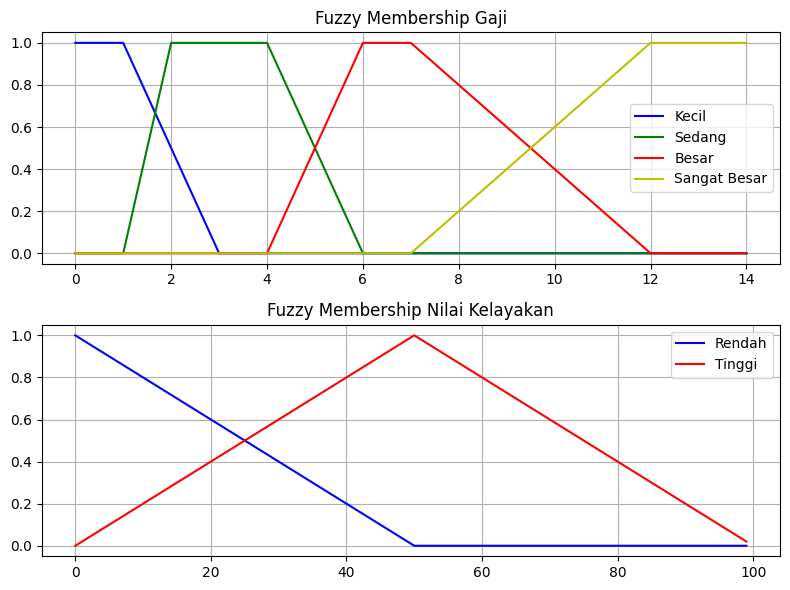

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Semesta Pembicaraan

x_ipk = np.arange(0, 4, 0.25)
x_gaji = np.arange(0, 15, 1)
x_nk = np.arange(0, 100, 1)

# Membership Function

gaji_kecil = fuzz.trapmf(x_gaji, [0, 0, 1, 3])
gaji_sedang = fuzz.trapmf(x_gaji, [1, 2, 4, 6])
gaji_besar = fuzz.trapmf(x_gaji, [4, 6, 7, 12])
gaji_sangat_besar = fuzz.trapmf(x_gaji, [7, 12, 15, 15])

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

ax1.plot(x_gaji, gaji_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_gaji, gaji_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_gaji, gaji_besar, 'r', linewidth=1.5, label='Besar')
ax1.plot(x_gaji, gaji_sangat_besar, 'y', linewidth=1.5, label='Sangat Besar')
ax1.set_title('Fuzzy Membership Gaji')
ax1.legend()
ax1.grid(True)

nk_rendah = fuzz.trimf(x_nk, [0, 0, 50])
nk_tinggi = fuzz.trimf(x_nk, [0, 50, 100])

ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Fuzzy Membership Nilai Kelayakan')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [8]:
# Fungsi Keanggotaan IPK
import numpy as np
import skfuzzy as fuzz

# Definisi variabel IPK
x_ipk = np.arange(0, 4, 0.1)
ipk_buruk = fuzz.trimf(x_ipk, [0, 0, 2])
ipk_cukup = fuzz.trimf(x_ipk, [1, 2, 3])
ipk_bagus = fuzz.trimf(x_ipk, [2, 4, 4])

# Definisi variabel Gaji
x_gaji = np.arange(0, 100, 1)
gaji_kecil = fuzz.trimf(x_gaji, [0, 0, 50])
gaji_sedang = fuzz.trimf(x_gaji, [20, 50, 80])
gaji_besar = fuzz.trimf(x_gaji, [60, 100, 100])
gaji_sangat_besar = fuzz.trimf(x_gaji, [80, 100, 100])

# Fungsi keanggotaan IPK
def fungsiKeanggotaan_IPK(nilai):
    buruk = fuzz.interp_membership(x_ipk, ipk_buruk, nilai)
    cukup = fuzz.interp_membership(x_ipk, ipk_cukup, nilai)
    bagus = fuzz.interp_membership(x_ipk, ipk_bagus, nilai)
    return buruk, cukup, bagus

# Fungsi keanggotaan Gaji
def fungsiKeanggotaan_Gaji(nilai):
    kecil = fuzz.interp_membership(x_gaji, gaji_kecil, nilai)
    sedang = fuzz.interp_membership(x_gaji, gaji_sedang, nilai)
    besar = fuzz.interp_membership(x_gaji, gaji_besar, nilai)
    sangat_besar = fuzz.interp_membership(x_gaji, gaji_sangat_besar, nilai)
    return kecil, sedang, besar, sangat_besar

# Menghitung Derajat Keanggotaan IPK
ipk_A = 2.5  # contoh nilai IPK mahasiswa A
ipk_B = 3.2  # contoh nilai IPK mahasiswa B

ipk_mhsA = fungsiKeanggotaan_IPK(ipk_A)
ipk_mhsB = fungsiKeanggotaan_IPK(ipk_B)

print("ipk mhsA : ", ipk_mhsA)
print("ipk mhsB : ", ipk_mhsB)


ipk mhsA :  (0.0, 0.5, 0.25)
ipk mhsB :  (0.0, 0.0, 0.6000000000000001)


In [9]:
# menghitung Derajat Keanggotaan Gaji
gaji_mhsA = fungsiKeanggotaan_Gaji(gaji_A)
gaji_mhsB = fungsiKeanggotaan_Gaji (gaji_B)
print("Gaji mhsA : ", gaji_mhsA)
print("Gaji mhsB: ", gaji_mhsB)


Gaji mhsA :  (0.8, 0.0, 0.0, 0.0)
Gaji mhsB:  (0.98, 0.0, 0.0, 0.0)


In [10]:
import numpy as np

# Rule 7: IF IPK = Cukup AND Gaji = Besar THEN NK = Rendah
nk_7 = np.fmin(ipk_mhsA[1], gaji_mhsA[2])

# Rule 8: IF IPK = Cukup AND Gaji = Sangat Besar THEN NK = Rendah
nk_8 = np.fmin(ipk_mhsA[1], gaji_mhsA[3])

# Rule 11: IF IPK = Bagus AND Gaji = Besar THEN NK = Tinggi
nk_11 = np.fmin(ipk_mhsA[2], gaji_mhsA[2])

# Rule 12: IF IPK = Bagus AND Gaji = Sangat Besar THEN NK = Rendah
nk_12 = np.fmin(ipk_mhsA[2], gaji_mhsA[3])

mhsA_nk_rendah = np.fmax(nk_7, np.fmax(nk_8, nk_12))
mhsA_nk_tinggi = nk_11

print("Nilai Kelayakan mhs A")
print("NK rendah :", mhsA_nk_rendah)
print("NK tinggi : ", mhsA_nk_tinggi)

Nilai Kelayakan mhs A
NK rendah : 0.0
NK tinggi :  0.0


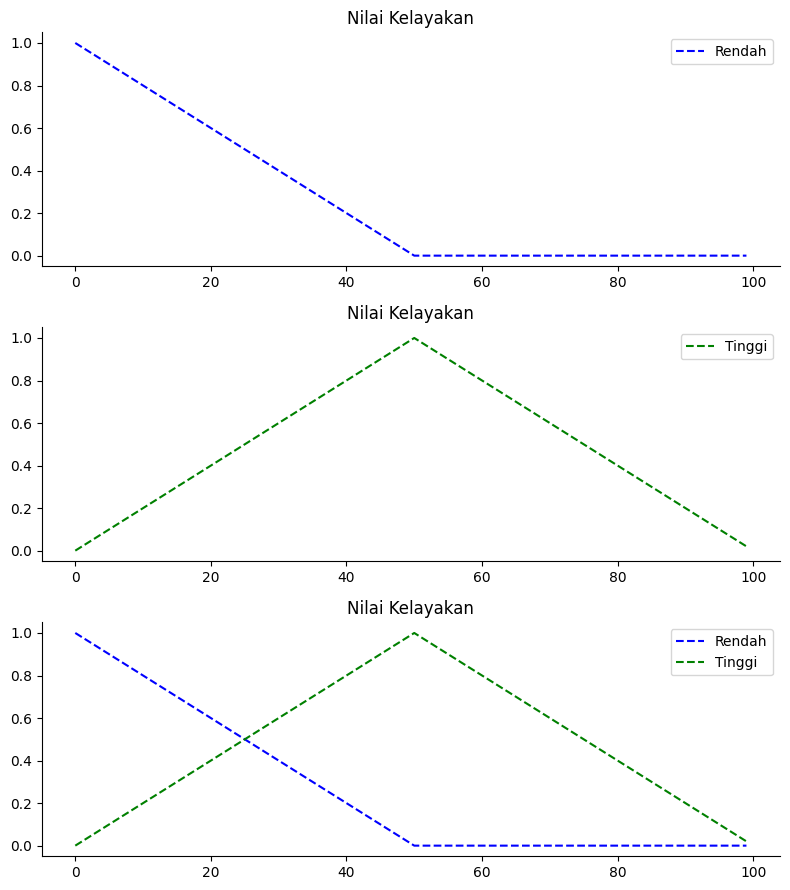

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Untuk Plot Arsir, pakai np.fmin
mhsA_nk_rendah = np.fmin(mhsA_nk_rendah, nk_7)
mhsA_nk_tinggi = np.fmin(mhsA_nk_tinggi, nk_11)

# titik awal arsir
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

# Visualize this
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

# x_nk_rendah = np.arange(0, 80, 1)
ax0.fill_between(x_nk, nkr, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax2.fill_between(x_nk, nk0, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Turn Off Top/Right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [13]:
# rule 5.IF IPK = Cukup AND Gaji = Kecil THEN NK = Tinggi
nk_5= np.fmin(ipk_mhsB[1],gaji_mhsB[0])

# rule 5.IF IPK = Cukup AND Gaji = Sedang THEN NK = Rendah
nk_6 = np.fmin(ipk_mhsB[1],gaji_mhsB[1])

#rule 9.IF IPK = Bagus AND Gaji = Kecil THEN NK = Tinggi
nk_9 = np.fmin(ipk_mhsB[2],gaji_mhsB[0])

#rule 10.IF IPK = Bagus AND Gaji = Sedang THEN NK = Tinggi
nk_10 = np.fmin(ipk_mhsB[2],gaji_mhsB[1])

mhsB_nk_tinggi = np.fmax(nk_5, np.fmax(nk_9, nk_10))
mhsB_nk_rendah= nk_6

print("Nilai Kelayakan mhs B")
print("NK rendah : ", mhsB_nk_rendah)
print("NK tinggi : ", mhsB_nk_tinggi)

Nilai Kelayakan mhs B
NK rendah :  0.0
NK tinggi :  0.6000000000000001


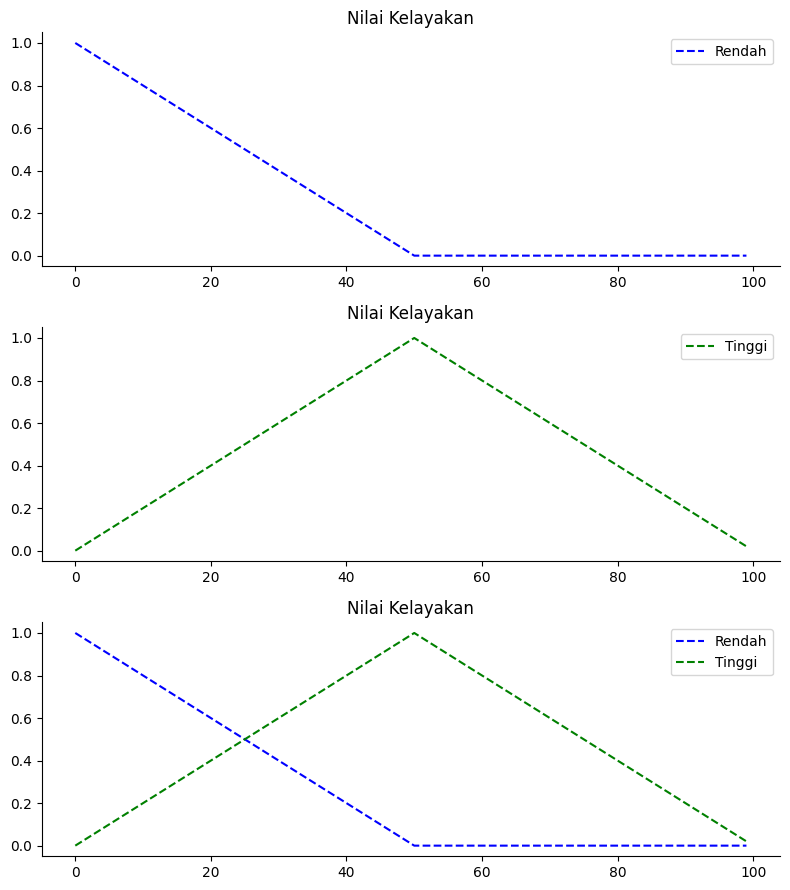

In [14]:
# Untuk Plot Arsir, pakai np.fmin
mhsB_nk_rendah = np.fmin(mhsB_nk_rendah, nk_6)
mhsB_nk_tinggi = np.fmin(mhsB_nk_tinggi, nk_10)

# titik awal arsir
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

# Visualize this
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

# x_nk_rendah = np.arange(0, 80, 1)
ax0.fill_between(x_nk, nkr, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='Rendah')
ax2.fill_between(x_nk, nk0, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Turn Off Top/Right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [15]:
# Komposisi Aturan
komposisi = np.fmax(mhsA_nk_rendah, mhsA_nk_tinggi)

# Hasil Defuzzifikasi
nk = fuzz.defuzz(x_nk, komposisi, 'centroid') 
print("Nilai Kelayakan Mhs A: ", nk)

# Nilai Fuzzy untuk membership function
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
nk_defuzzy

AssertionError: Length of x and fuzzy membership function must be                           identical.

NameError: name 'nk' is not defined

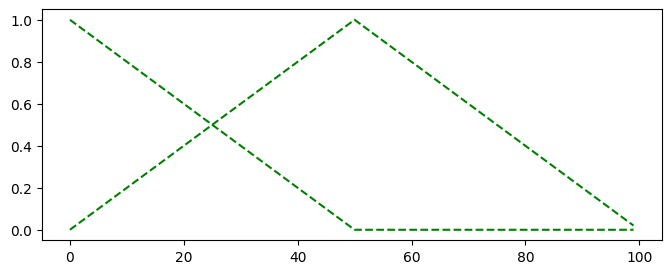

In [20]:
# Visualisasi Hasil
fig, ax0 = plt.subplots (figsize=(8,3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah') 
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle= '--', label='Tinggi') 
ax0.fill_between (x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9) 
ax0.set_title( 'Defuzzifikasi dengan metode centroid')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible (False) 
    ax.spines['right' ].set_visible (False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [23]:
import numpy as np
import skfuzzy as fuzz

komposisi = np.fmax(mhsB_nk_rendah, mhsB_nk_tinggi)

nk = fuzz.defuzz(x_nk, komposisi, 'centroid')
print("Nilai Kelayakan Mhs B: ", nk)

nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)

print("Nilai Fuzzy untuk NK defuzzy:", nk_defuzzy)

AssertionError: Length of x and fuzzy membership function must be                           identical.

NameError: name 'nk' is not defined

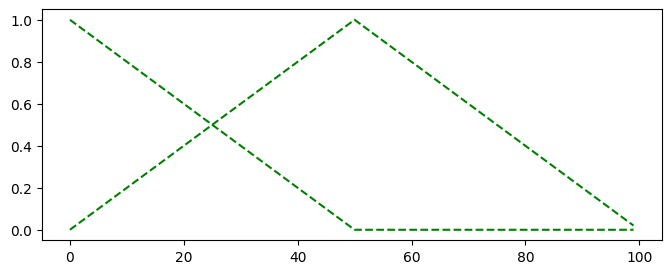

In [25]:
# Visualisasi Hasil
fig, ax0 = plt.subplots (figsize=(8, 3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle= '--', label='Rendah') 
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle= '--', label='Tinggi') 
ax0.fill_between (x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9) 
ax0.set_title( 'Defuzzifikasi dengan metode centroid')

# Turn off top/right axes
for ax in (ax0,): 
    ax.spines['top'].set_visible (False)
    ax. spines['right'].set_visible (False)
    ax.get_xaxis().tick_bottom() 
    ax.get_yaxis().tick_left()
plt.tight_layout()